In [1]:
import pandas as pd
import numpy as np
import os
import json
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import re
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [2]:
#Import Performance data.

df1=pd.read_csv(r'D:\InstagramData\Julsep.csv')
df2=pd.read_csv(r'D:\InstagramData\Mayjul.csv')
df3=pd.read_csv(r'D:\InstagramData\Sepnov.csv')

In [3]:
#combine all the DataFrame into a single DataFrame.

df = pd.concat([df1, df2, df3], axis=0)
df

,Post ID,Account ID,Account username,Account name,Description,Duration (sec),Publish time,Permalink,Post type,Comment,Date,Impressions,Reach,Shares,Follows,Plays,Likes,Comments,Saves
0,17998219210833971,17841403051063377,red_stoic,Red,How I spend my nights...\n•\n•\n#anime #demons...,14,07/02/2023 22:07,https://www.instagram.com/reel/CuOTs3QPc_E/,IG reel,NaN,Lifetime,432,402,0,0,419,34,5,1
1,17958063140614930,17841403051063377,red_stoic,Red,I want this Sh*t\n•\n•\n•\n#powerlifting #gymc...,10,07/03/2023 19:07,https://www.instagram.com/reel/CuQiQbmRYbU/,IG reel,NaN,Lifetime,2293,2193,3,3,2271,289,2,13
2,17962384793394239,17841403051063377,red_stoic,Red,The second last one tho \n•\n•\n#powerlifting ...,20,07/03/2023 20:07,https://www.instagram.com/reel/CuQn6aBvui1/,IG reel,NaN,Lifetime,230,189,0,1,228,25,0,3
3,17869470779943399,17841403051063377,red_stoic,Red,Healthy body 🙂\n•\n•\n#powerlifting #gymcrush ...,9,07/05/2023 21:07,https://www.instagram.com/reel/CuV8wVdMllJ/,IG reel,NaN,Lifetime,520,488,2,0,485,30,2,2
4,18023518276598531,17841403051063377,red_stoic,Red,Grinding\n•\n•\n•\n•\n#powerlifting #gymcrush ...,9,07/05/2023 22:07,https://www.instagram.com/reel/CuWAggVpjT4/,IG reel,NaN,Lifetime,212,181,1,0,214,24,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23,17872108061999429,17841403051063377,red_stoic,Red,discipline over instant gratification every ti...,4,11/04/2023 18:11,https://www.instagram.com/reel/CzPxXYfIQb_/,IG reel,NaN,Lifetime,153,138,0,0,162,22,0,2
24,17851323279055064,17841403051063377,red_stoic,Red,I fear no monsters\n.\n.\n.\n.\n#stoic #stoici...,16,11/05/2023 18:11,https://www.instagram.com/reel/CzSeFVOomsb/,IG reel,NaN,Lifetime,197,176,0,0,204,23,1,3
25,18086529175387869,17841403051063377,red_stoic,Red,Get out of your head\n.\n.\n.\n#fitness #gym #...,23,11/06/2023 19:11,https://www.instagram.com/reel/CzVHylyIjKB/,IG reel,NaN,Lifetime,165,156,1,2,172,17,0,4
26,18033821944625804,17841403051063377,red_stoic,Red,One decision away\n.\n.\n.\n.\n#lifequotes #qu...,7,11/08/2023 15:11,https://www.instagram.com/reel/CzZyzepINcp/,IG reel,NaN,Lifetime,14,14,0,0,22,6,0,0


In [4]:
#Drop columns which are not useful to derive insights.

columns_to_drop = ['Post ID','Account ID', 'Account username', 'Account name', 'Post type', 'Permalink']
df = df.drop(columns=columns_to_drop)

In [5]:
df

,Description,Duration (sec),Publish time,Comment,Date,Impressions,Reach,Shares,Follows,Plays,Likes,Comments,Saves
0,How I spend my nights...\n•\n•\n#anime #demons...,14,07/02/2023 22:07,NaN,Lifetime,432,402,0,0,419,34,5,1
1,I want this Sh*t\n•\n•\n•\n#powerlifting #gymc...,10,07/03/2023 19:07,NaN,Lifetime,2293,2193,3,3,2271,289,2,13
2,The second last one tho \n•\n•\n#powerlifting ...,20,07/03/2023 20:07,NaN,Lifetime,230,189,0,1,228,25,0,3
3,Healthy body 🙂\n•\n•\n#powerlifting #gymcrush ...,9,07/05/2023 21:07,NaN,Lifetime,520,488,2,0,485,30,2,2
4,Grinding\n•\n•\n•\n•\n#powerlifting #gymcrush ...,9,07/05/2023 22:07,NaN,Lifetime,212,181,1,0,214,24,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
23,discipline over instant gratification every ti...,4,11/04/2023 18:11,NaN,Lifetime,153,138,0,0,162,22,0,2
24,I fear no monsters\n.\n.\n.\n.\n#stoic #stoici...,16,11/05/2023 18:11,NaN,Lifetime,197,176,0,0,204,23,1,3
25,Get out of your head\n.\n.\n.\n#fitness #gym #...,23,11/06/2023 19:11,NaN,Lifetime,165,156,1,2,172,17,0,4
26,One decision away\n.\n.\n.\n.\n#lifequotes #qu...,7,11/08/2023 15:11,NaN,Lifetime,14,14,0,0,22,6,0,0


In [6]:
#There are two columns(comment,comments), comment is null so I'm going to drop it as well

df = df.drop(columns='Comment')
df

,Description,Duration (sec),Publish time,Date,Impressions,Reach,Shares,Follows,Plays,Likes,Comments,Saves
0,How I spend my nights...\n•\n•\n#anime #demons...,14,07/02/2023 22:07,Lifetime,432,402,0,0,419,34,5,1
1,I want this Sh*t\n•\n•\n•\n#powerlifting #gymc...,10,07/03/2023 19:07,Lifetime,2293,2193,3,3,2271,289,2,13
2,The second last one tho \n•\n•\n#powerlifting ...,20,07/03/2023 20:07,Lifetime,230,189,0,1,228,25,0,3
3,Healthy body 🙂\n•\n•\n#powerlifting #gymcrush ...,9,07/05/2023 21:07,Lifetime,520,488,2,0,485,30,2,2
4,Grinding\n•\n•\n•\n•\n#powerlifting #gymcrush ...,9,07/05/2023 22:07,Lifetime,212,181,1,0,214,24,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
23,discipline over instant gratification every ti...,4,11/04/2023 18:11,Lifetime,153,138,0,0,162,22,0,2
24,I fear no monsters\n.\n.\n.\n.\n#stoic #stoici...,16,11/05/2023 18:11,Lifetime,197,176,0,0,204,23,1,3
25,Get out of your head\n.\n.\n.\n#fitness #gym #...,23,11/06/2023 19:11,Lifetime,165,156,1,2,172,17,0,4
26,One decision away\n.\n.\n.\n.\n#lifequotes #qu...,7,11/08/2023 15:11,Lifetime,14,14,0,0,22,6,0,0


In [7]:
#Before moving forward 
#Impressions means How many times the video was displayed. (same account can watch mutliple time to incraese count),(Was on the search page but not clicked)
#Reach How many accounts saw the video. (watching again doesn't increase count)
#plays how many times the video was played.

In [8]:
#Correlation between the columns

correlation_matrix = df.corr()
correlation_matrix

,Duration (sec),Impressions,Reach,Shares,Follows,Plays,Likes,Comments,Saves
Duration (sec),1.000000,-0.024190,-0.024990,0.024940,-0.042123,-0.024105,-0.030283,-0.038054,0.009931
Impressions,-0.024190,1.000000,0.999994,0.527866,0.968132,0.999987,0.995155,0.979568,0.978926
Reach,-0.024990,0.999994,1.000000,0.529989,0.967576,0.999995,0.994924,0.979132,0.979162
Shares,0.024940,0.527866,0.529989,1.000000,0.302917,0.531915,0.445320,0.369566,0.665765
Follows,-0.042123,0.968132,0.967576,0.302917,1.000000,0.966985,0.987679,0.992729,0.902166
Plays,-0.024105,0.999987,0.999995,0.531915,0.966985,1.000000,0.994707,0.978766,0.979694
Likes,-0.030283,0.995155,0.994924,0.445320,0.987679,0.994707,1.000000,0.991720,0.957796
Comments,-0.038054,0.979568,0.979132,0.369566,0.992729,0.978766,0.991720,1.000000,0.927149
Saves,0.009931,0.978926,0.979162,0.665765,0.902166,0.979694,0.957796,0.927149,1.000000


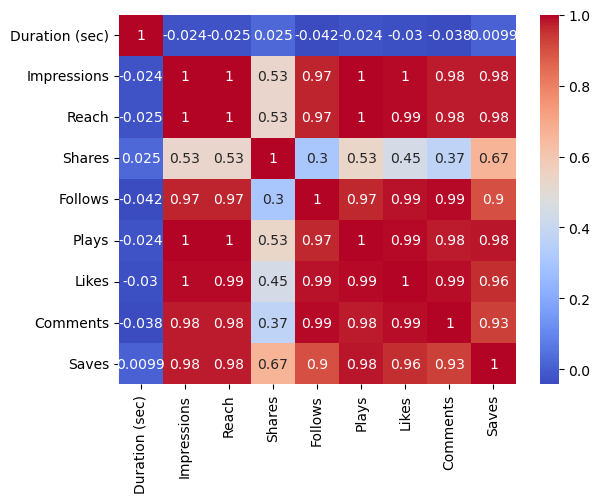

In [9]:
# Generate a heatmap of the correlation matrix

sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.show()

In [10]:
#Order of importance of attribute to Increase Traffic of account using reels
#
#1.Likes
#2.comments
#3.save
#4.share

In [11]:
#Splitting the Publish time into Date and time.

df['Published Date'] = pd.to_datetime(df['Publish time'], format='%m/%d/%Y %H:%M').dt.date
df['Published Time'] = pd.to_datetime(df['Publish time'], format='%m/%d/%Y %H:%M').dt.time

In [12]:
df

,Description,Duration (sec),Publish time,Date,Impressions,Reach,Shares,Follows,Plays,Likes,Comments,Saves,Published Date,Published Time
0,How I spend my nights...\n•\n•\n#anime #demons...,14,07/02/2023 22:07,Lifetime,432,402,0,0,419,34,5,1,2023-07-02,22:07:00
1,I want this Sh*t\n•\n•\n•\n#powerlifting #gymc...,10,07/03/2023 19:07,Lifetime,2293,2193,3,3,2271,289,2,13,2023-07-03,19:07:00
2,The second last one tho \n•\n•\n#powerlifting ...,20,07/03/2023 20:07,Lifetime,230,189,0,1,228,25,0,3,2023-07-03,20:07:00
3,Healthy body 🙂\n•\n•\n#powerlifting #gymcrush ...,9,07/05/2023 21:07,Lifetime,520,488,2,0,485,30,2,2,2023-07-05,21:07:00
4,Grinding\n•\n•\n•\n•\n#powerlifting #gymcrush ...,9,07/05/2023 22:07,Lifetime,212,181,1,0,214,24,0,0,2023-07-05,22:07:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23,discipline over instant gratification every ti...,4,11/04/2023 18:11,Lifetime,153,138,0,0,162,22,0,2,2023-11-04,18:11:00
24,I fear no monsters\n.\n.\n.\n.\n#stoic #stoici...,16,11/05/2023 18:11,Lifetime,197,176,0,0,204,23,1,3,2023-11-05,18:11:00
25,Get out of your head\n.\n.\n.\n#fitness #gym #...,23,11/06/2023 19:11,Lifetime,165,156,1,2,172,17,0,4,2023-11-06,19:11:00
26,One decision away\n.\n.\n.\n.\n#lifequotes #qu...,7,11/08/2023 15:11,Lifetime,14,14,0,0,22,6,0,0,2023-11-08,15:11:00


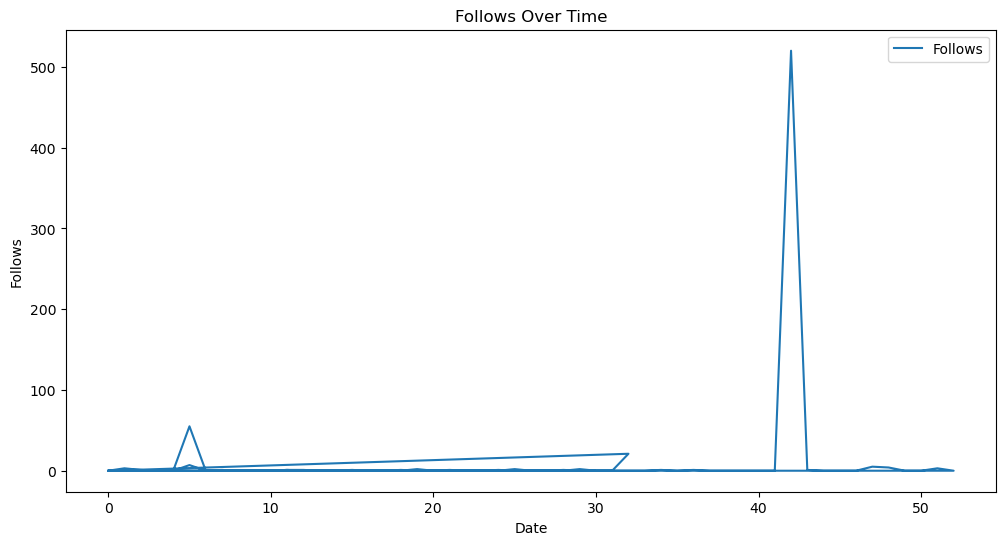

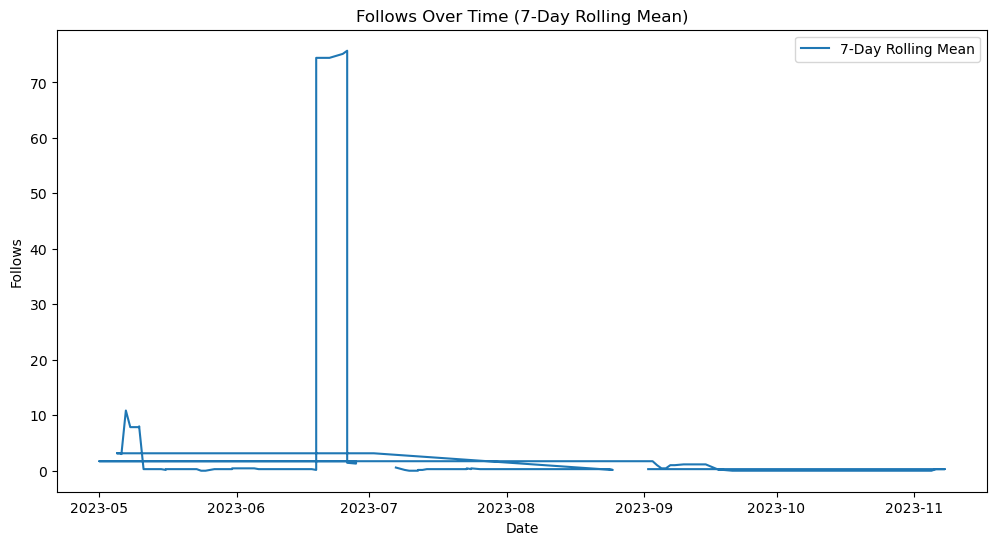

In [13]:
#Time Series Analysis
timesdf=df.copy()
timesdf.set_index('Published Date', inplace=True)

# Plot time series data for a specific metric, e.g., 'Follows'
plt.figure(figsize=(12, 6))
plt.plot(df['Follows'], label='Follows')
plt.title('Follows Over Time')
plt.xlabel('Date')
plt.ylabel('Follows')
plt.legend()
plt.show()

# Smooth the time series data using a rolling mean (e.g., 7-day moving average)
rolling_mean = timesdf['Follows'].rolling(window=7).mean()

# Plot the smoothed time series
plt.figure(figsize=(12, 6))
plt.plot(rolling_mean, label='7-Day Rolling Mean')
plt.title('Follows Over Time (7-Day Rolling Mean)')
plt.xlabel('Date')
plt.ylabel('Follows')
plt.legend()
plt.show()

In [14]:
# Extract the hour from the 'Published Time' column
df['Hour'] = pd.to_datetime(df['Published Time'], format='%H:%M:%S').dt.hour

# Calculate engagement metrics (e.g., Likes, Comments, Shares) for each post

# Group data by hour and calculate average engagement metrics
hourly_metrics = df.groupby('Hour')[['Likes', 'Comments', 'Shares']].mean()

# Identify the hour with the highest average engagement for each metric
best_time_likes = hourly_metrics['Likes'].idxmax()
best_time_comments = hourly_metrics['Comments'].idxmax()
best_time_shares = hourly_metrics['Shares'].idxmax()

print(f"The best time for Likes is at {best_time_likes} o'clock.")
print(f"The best time for Comments is at {best_time_comments} o'clock.")
print(f"The best time for Shares is at {best_time_shares} o'clock.")

The best time for Likes is at 12 o'clock.
The best time for Comments is at 12 o'clock.
The best time for Shares is at 19 o'clock.


In [15]:
df=df.drop(df['Likes'].idxmax())

In [16]:
df

,Description,Duration (sec),Publish time,Date,Impressions,Reach,Shares,Follows,Plays,Likes,Comments,Saves,Published Date,Published Time,Hour
0,How I spend my nights...\n•\n•\n#anime #demons...,14,07/02/2023 22:07,Lifetime,432,402,0,0,419,34,5,1,2023-07-02,22:07:00,22
1,I want this Sh*t\n•\n•\n•\n#powerlifting #gymc...,10,07/03/2023 19:07,Lifetime,2293,2193,3,3,2271,289,2,13,2023-07-03,19:07:00,19
2,The second last one tho \n•\n•\n#powerlifting ...,20,07/03/2023 20:07,Lifetime,230,189,0,1,228,25,0,3,2023-07-03,20:07:00,20
3,Healthy body 🙂\n•\n•\n#powerlifting #gymcrush ...,9,07/05/2023 21:07,Lifetime,520,488,2,0,485,30,2,2,2023-07-05,21:07:00,21
4,Grinding\n•\n•\n•\n•\n#powerlifting #gymcrush ...,9,07/05/2023 22:07,Lifetime,212,181,1,0,214,24,0,0,2023-07-05,22:07:00,22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23,discipline over instant gratification every ti...,4,11/04/2023 18:11,Lifetime,153,138,0,0,162,22,0,2,2023-11-04,18:11:00,18
24,I fear no monsters\n.\n.\n.\n.\n#stoic #stoici...,16,11/05/2023 18:11,Lifetime,197,176,0,0,204,23,1,3,2023-11-05,18:11:00,18
25,Get out of your head\n.\n.\n.\n#fitness #gym #...,23,11/06/2023 19:11,Lifetime,165,156,1,2,172,17,0,4,2023-11-06,19:11:00,19
26,One decision away\n.\n.\n.\n.\n#lifequotes #qu...,7,11/08/2023 15:11,Lifetime,14,14,0,0,22,6,0,0,2023-11-08,15:11:00,15


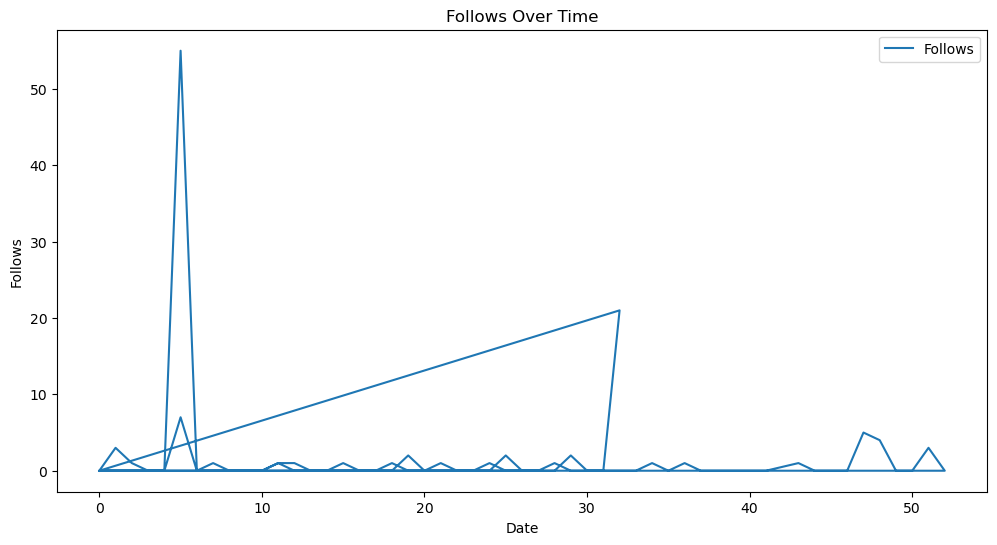

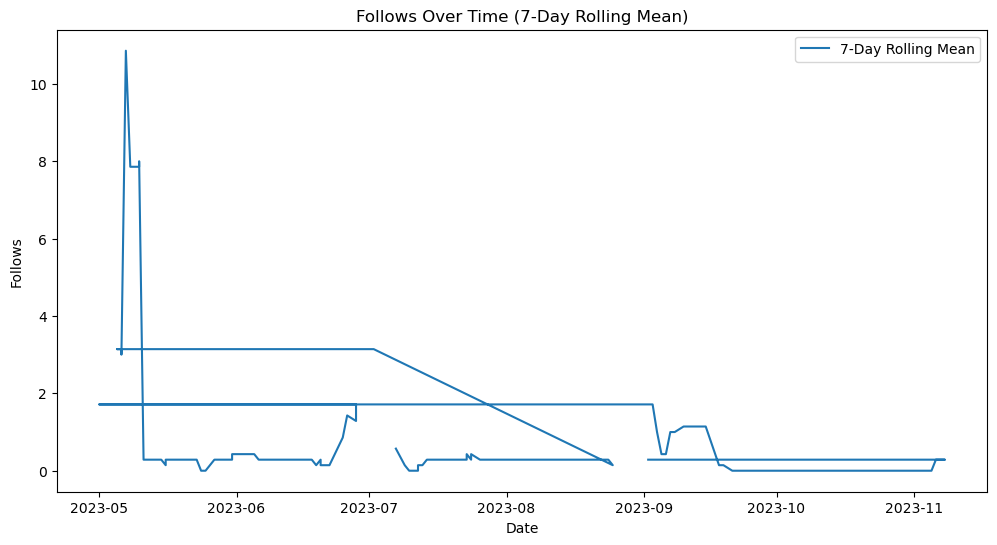

In [445]:
#Time Series Analysis
timesdf=df.copy()
timesdf.set_index('Published Date', inplace=True)

# Plot time series data for a specific metric, e.g., 'Follows'
plt.figure(figsize=(12, 6))
plt.plot(df['Follows'], label='Follows')
plt.title('Follows Over Time')
plt.xlabel('Date')
plt.ylabel('Follows')
plt.legend()
plt.show()

# Smooth the time series data using a rolling mean (e.g., 7-day moving average)
rolling_mean = timesdf['Follows'].rolling(window=7).mean()

# Plot the smoothed time series
plt.figure(figsize=(12, 6))
plt.plot(rolling_mean, label='7-Day Rolling Mean')
plt.title('Follows Over Time (7-Day Rolling Mean)')
plt.xlabel('Date')
plt.ylabel('Follows')
plt.legend()
plt.show()

In [446]:
# Extract the hour from the 'Published Time' column
df['Hour'] = pd.to_datetime(df['Published Time'], format='%H:%M:%S').dt.hour

# Calculate engagement metrics (e.g., Likes, Comments, Shares) for each post

# Group data by hour and calculate average engagement metrics
hourly_metrics = df.groupby('Hour')[['Likes', 'Comments', 'Shares']].mean()

# Identify the hour with the highest average engagement for each metric
best_time_likes = hourly_metrics['Likes'].idxmax()
best_time_comments = hourly_metrics['Comments'].idxmax()
best_time_shares = hourly_metrics['Shares'].idxmax()

print(f"The best time for Likes is at {best_time_likes} o'clock.")
print(f"The best time for Comments is at {best_time_comments} o'clock.")
print(f"The best time for Shares is at {best_time_shares} o'clock.")

The best time for Likes is at 19 o'clock.
The best time for Comments is at 19 o'clock.
The best time for Shares is at 19 o'clock.


In [447]:
df=df.drop(df['Likes'].idxmax())

In [448]:
df=df.drop(df['Likes'].idxmax())

In [449]:
# Extract the hour from the 'Published Time' column
df['Hour'] = pd.to_datetime(df['Published Time'], format='%H:%M:%S').dt.hour

# Calculate engagement metrics (e.g., Likes, Comments, Shares) for each post

# Group data by hour and calculate average engagement metrics
hourly_metrics = df.groupby('Hour')[['Likes', 'Comments', 'Shares']].mean()

# Identify the hour with the highest average engagement for each metric
best_time_likes = hourly_metrics['Likes'].idxmax()
best_time_comments = hourly_metrics['Comments'].idxmax()
best_time_shares = hourly_metrics['Shares'].idxmax()

print(f"The best time for Likes is at {best_time_likes} o'clock.")
print(f"The best time for Comments is at {best_time_comments} o'clock.")
print(f"The best time for Shares is at {best_time_shares} o'clock.")

The best time for Likes is at 9 o'clock.
The best time for Comments is at 1 o'clock.
The best time for Shares is at 5 o'clock.


In [450]:
df=df.drop(df['Likes'].idxmax())

In [451]:
df=df.drop(df['Likes'].idxmax())

In [452]:
# Extract the hour from the 'Published Time' column
df['Hour'] = pd.to_datetime(df['Published Time'], format='%H:%M:%S').dt.hour

# Calculate engagement metrics (e.g., Likes, Comments, Shares) for each post

# Group data by hour and calculate average engagement metrics
hourly_metrics = df.groupby('Hour')[['Likes', 'Comments', 'Shares']].mean()

# Identify the hour with the highest average engagement for each metric
best_time_likes = hourly_metrics['Likes'].idxmax()
best_time_comments = hourly_metrics['Comments'].idxmax()
best_time_shares = hourly_metrics['Shares'].idxmax()

print(f"The best time for Likes is at {best_time_likes} o'clock.")
print(f"The best time for Comments is at {best_time_comments} o'clock.")
print(f"The best time for Shares is at {best_time_shares} o'clock.")

The best time for Likes is at 12 o'clock.
The best time for Comments is at 1 o'clock.
The best time for Shares is at 5 o'clock.


In [453]:
df=df.drop(df['Likes'].idxmax())

In [454]:
# Extract the hour from the 'Published Time' column
df['Hour'] = pd.to_datetime(df['Published Time'], format='%H:%M:%S').dt.hour

# Calculate engagement metrics (e.g., Likes, Comments, Shares) for each post

# Group data by hour and calculate average engagement metrics
hourly_metrics = df.groupby('Hour')[['Likes', 'Comments', 'Shares']].mean()

# Identify the hour with the highest average engagement for each metric
best_time_likes = hourly_metrics['Likes'].idxmax()
best_time_comments = hourly_metrics['Comments'].idxmax()
best_time_shares = hourly_metrics['Shares'].idxmax()

print(f"The best time for Likes is at {best_time_likes} o'clock.")
print(f"The best time for Comments is at {best_time_comments} o'clock.")
print(f"The best time for Shares is at {best_time_shares} o'clock.")

The best time for Likes is at 12 o'clock.
The best time for Comments is at 1 o'clock.
The best time for Shares is at 5 o'clock.


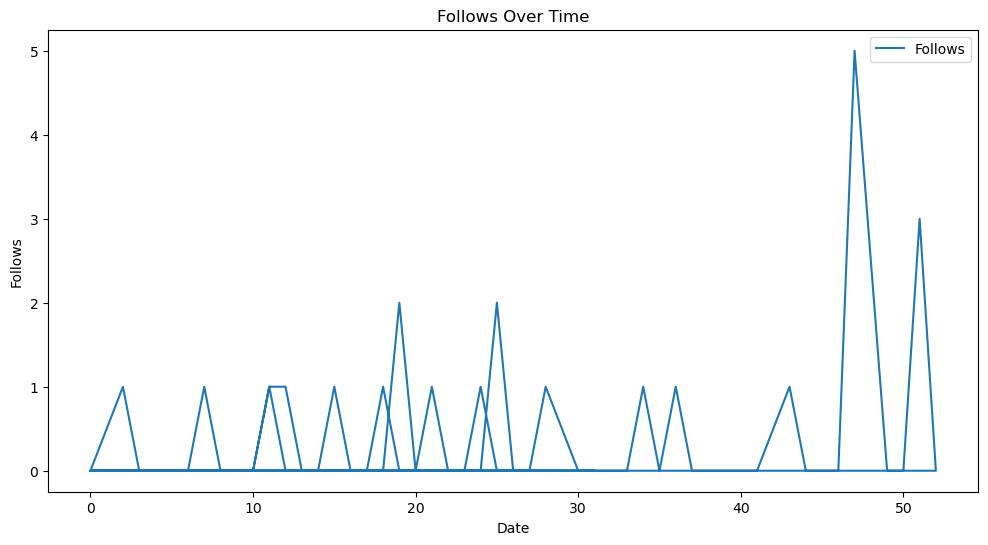

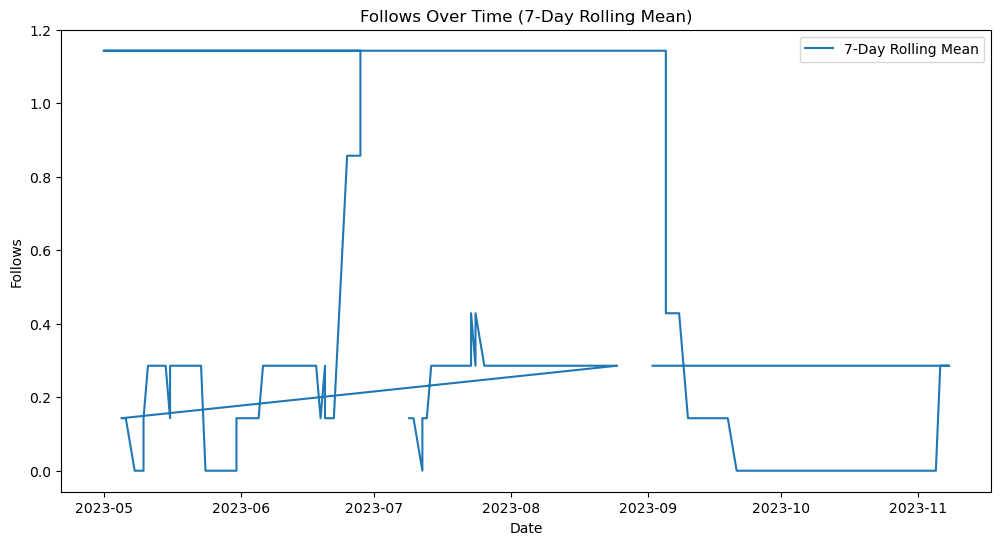

In [455]:
#Time Series Analysis
timesdf=df.copy()
timesdf.set_index('Published Date', inplace=True)

# Plot time series data for a specific metric, e.g., 'Follows'
plt.figure(figsize=(12, 6))
plt.plot(df['Follows'], label='Follows')
plt.title('Follows Over Time')
plt.xlabel('Date')
plt.ylabel('Follows')
plt.legend()
plt.show()

# Smooth the time series data using a rolling mean (e.g., 7-day moving average)
rolling_mean = timesdf['Follows'].rolling(window=7).mean()

# Plot the smoothed time series
plt.figure(figsize=(12, 6))
plt.plot(rolling_mean, label='7-Day Rolling Mean')
plt.title('Follows Over Time (7-Day Rolling Mean)')
plt.xlabel('Date')
plt.ylabel('Follows')
plt.legend()
plt.show()

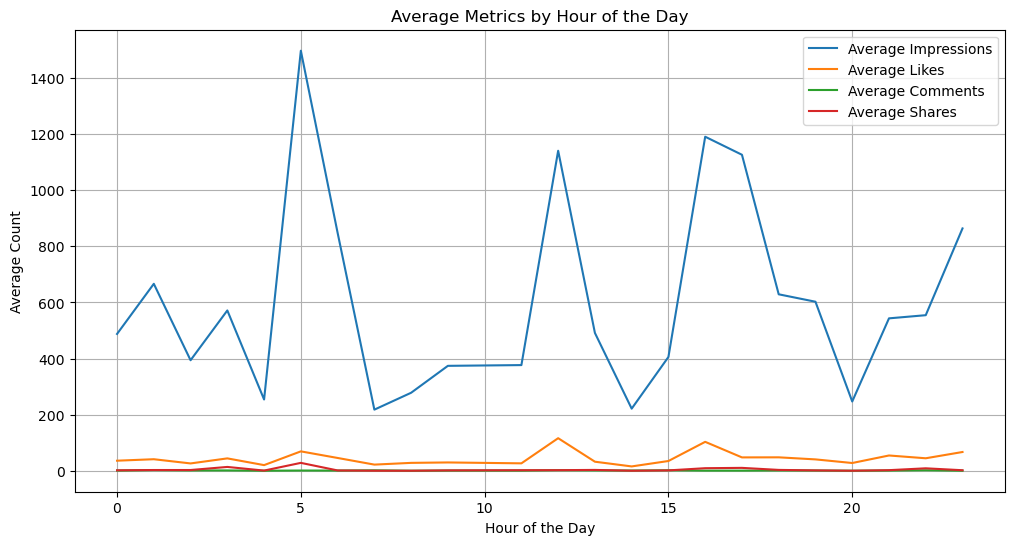

In [456]:
# Group data by the 'Hour' column
hourly_data = df.groupby('Hour').agg({
    'Impressions': 'mean',
    'Likes': 'mean',
    'Comments': 'mean',
    'Shares': 'mean'
}).reset_index()

# Plot average metrics by hour
plt.figure(figsize=(12, 6))
plt.plot(hourly_data['Hour'], hourly_data['Impressions'], label='Average Impressions')
plt.plot(hourly_data['Hour'], hourly_data['Likes'], label='Average Likes')
plt.plot(hourly_data['Hour'], hourly_data['Comments'], label='Average Comments')
plt.plot(hourly_data['Hour'], hourly_data['Shares'], label='Average Shares')

plt.title('Average Metrics by Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Count')
plt.legend()
plt.grid(True)
plt.show()

In [457]:
# Afternoon 12 is the best time for me to post a reel since likes is more significant to grow follower count.


In [458]:
df


,Description,Duration (sec),Publish time,Date,Impressions,Reach,Shares,Follows,Plays,Likes,Comments,Saves,Published Date,Published Time,Hour
0,How I spend my nights...\n•\n•\n#anime #demons...,14,07/02/2023 22:07,Lifetime,432,402,0,0,419,34,5,1,2023-07-02,22:07:00,22
2,The second last one tho \n•\n•\n#powerlifting ...,20,07/03/2023 20:07,Lifetime,230,189,0,1,228,25,0,3,2023-07-03,20:07:00,20
3,Healthy body 🙂\n•\n•\n#powerlifting #gymcrush ...,9,07/05/2023 21:07,Lifetime,520,488,2,0,485,30,2,2,2023-07-05,21:07:00,21
4,Grinding\n•\n•\n•\n•\n#powerlifting #gymcrush ...,9,07/05/2023 22:07,Lifetime,212,181,1,0,214,24,0,0,2023-07-05,22:07:00,22
6,I spend my nights...\n•\n•\n#jujustukaisen #an...,16,07/07/2023 18:07,Lifetime,123,98,0,0,120,15,0,0,2023-07-07,18:07:00,18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23,discipline over instant gratification every ti...,4,11/04/2023 18:11,Lifetime,153,138,0,0,162,22,0,2,2023-11-04,18:11:00,18
24,I fear no monsters\n.\n.\n.\n.\n#stoic #stoici...,16,11/05/2023 18:11,Lifetime,197,176,0,0,204,23,1,3,2023-11-05,18:11:00,18
25,Get out of your head\n.\n.\n.\n#fitness #gym #...,23,11/06/2023 19:11,Lifetime,165,156,1,2,172,17,0,4,2023-11-06,19:11:00,19
26,One decision away\n.\n.\n.\n.\n#lifequotes #qu...,7,11/08/2023 15:11,Lifetime,14,14,0,0,22,6,0,0,2023-11-08,15:11:00,15
